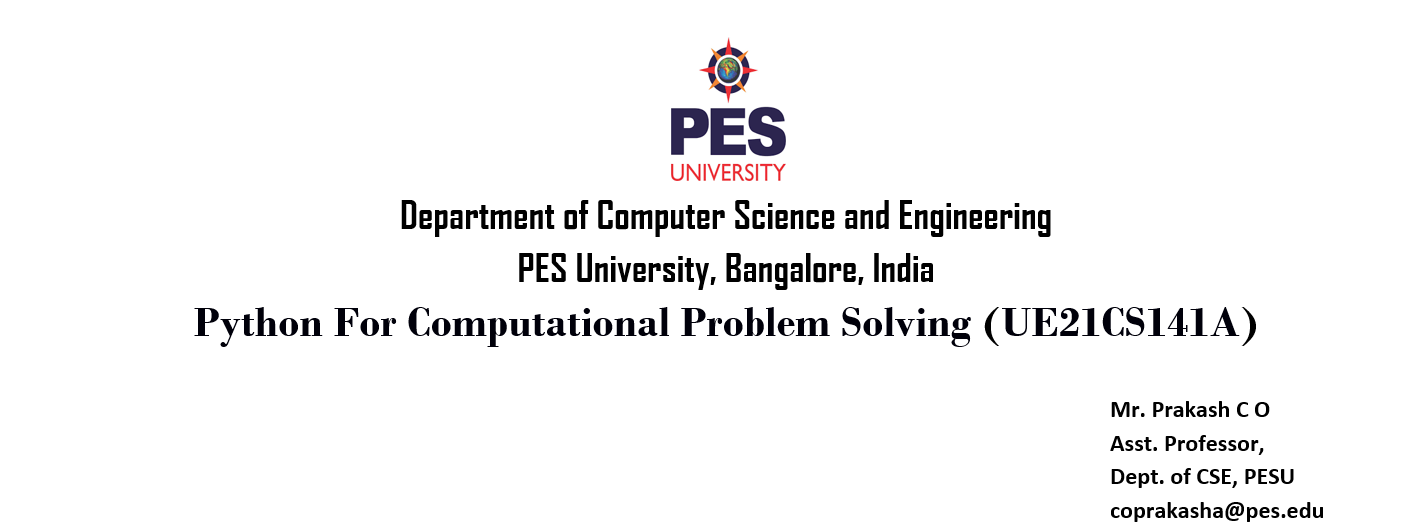

### Files in Python
The variables we create in our program remain in memory until the end of the program. They are lost when the program terminates. We require files to make the information permanent. We call this feature persistence. The files persist not only after the program termination, but also after rebooting or after restarting a computer.
##### Advantages of Files: 
* Data is persistant even after the termination of the program.
* The data set can be much larger.
* The data can be input much more quickly and with less chance of error.

Thus, A file is some information or data which stays in the computer storage devices.
##### File Types
In Python, a file is categorized as either text or binary. 

* Text files (Examples:  .txt, .rtf, .csv, .py,  …) are structured as a sequence of lines, where each line includes a sequence of characters. Each line is terminated with a special character, called the EOL or End of Line character.Text files are humanly readable.

* A binary file (Examples:  .png, .jpg …) is any type of file that is not a text file. In binary files data is displayed in some encoded format (using 0’s and 1’s) instead of plain characters. 

Files on most modern file systems are composed of three main parts:
* Header: metadata about the contents of the file (file name, size, type, and so on)
* Data: contents of the file as written by the creator or editor
* End of file (EOF): special character that indicates the end of the file

##### File Objects 
A file object allows us to use, access and manipulate all the user accessible files. 

To use a file, in Python, we make an association of an entity called file object with the file. This file object refers to some data structures outside of our program which in turn refers to the file. 

We call the referred file as a resource. We get the file resource (when we need) using a function called open. We should release this file resource whenever we do not require any more. We release the file resource by calling a function called close on the file object.

A file may be 
* used for reading if it already exists. 
* created or overwritten. 
* used for reading as well as writing. 

We indicate our intention by specifying what is called the mode 
* ‘r’ for read, 
* ‘w’ for write. etc..


#### The open() method
Python has a built-in function open() to open a file. This function creates a file object.

Syntax:
* f = open(file_name, access_mode)
* f = open(file_name, access_mode='r', buffering=-1, encoding=None, errors=None, newline=None, closefd=True, opener=None)

Where,
* file_name = name of the file to be opened
* access_mode = mode in which the file is to be opened. It can be read, write etc. By default, it opens the file in reading mode (r) if not specified explicitly. 

Here is the list of different modes in which a file can be opened.

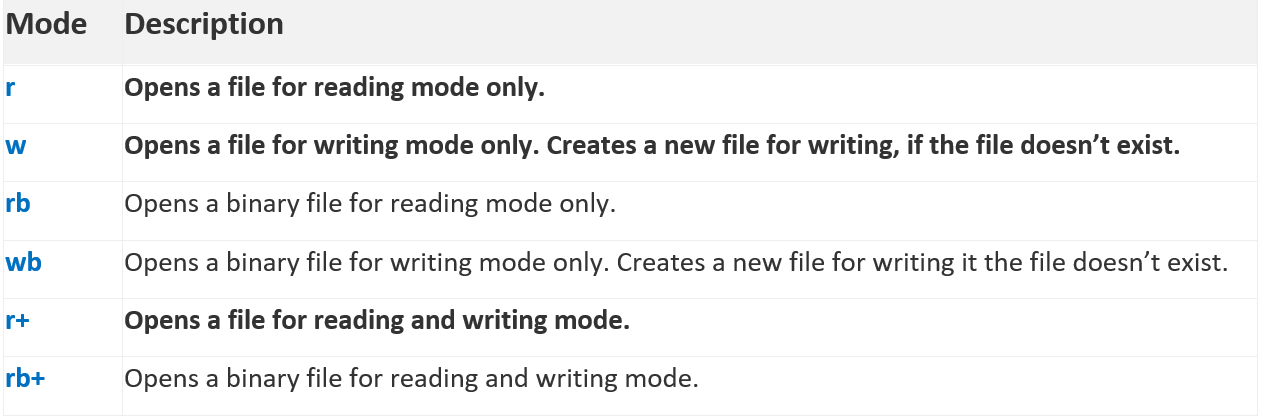
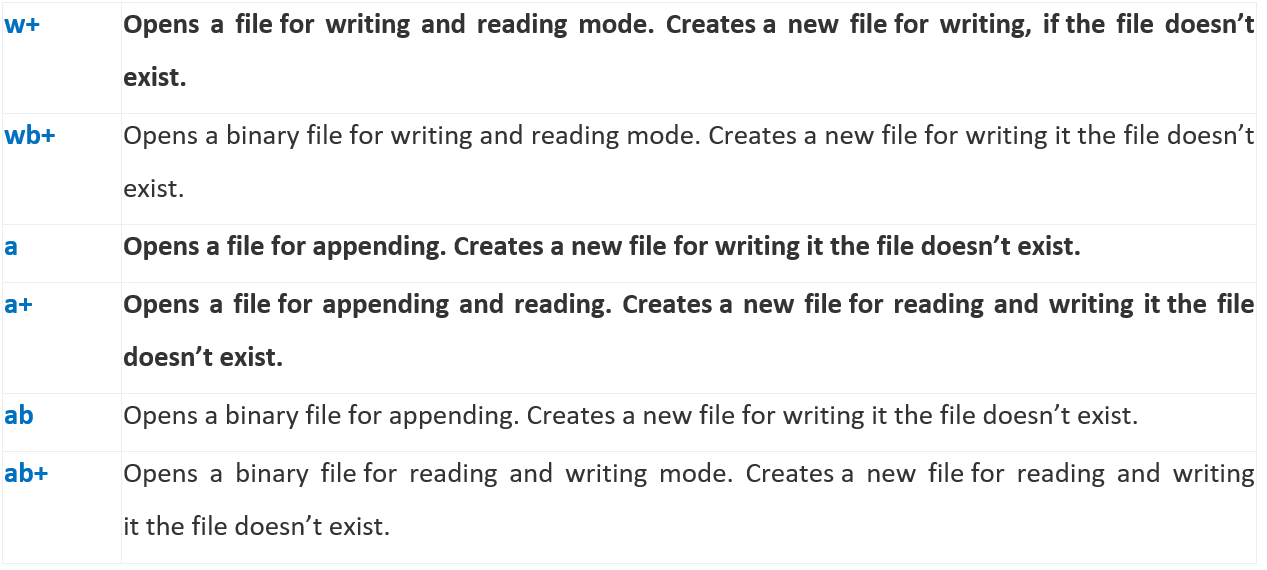

Note: Normally, files are opened in text mode, that means, you read and write strings from and to the file, which are encoded in a specific encoding. If encoding is not specified, the default is platform dependent. 'b' appended to the mode opens the file in binary mode: now the data is read and written in the form of bytes objects. This mode should be used for all files that don’t contain text.

A file opening may not always succeed. If it fails, it throws an exception. A few possible exceptions:

* opening a non-existent file for reading
* opening a file for writing where directory does not allow us to create files

Let us examine an example for opening a non-existent file for reading.


In [2]:
# We specify the physical filename - the name by which the operating system 
 # knows the file - in a function called open.
# We open file in different modes -	reading(r), writing(w), appending(a) ...
# We get a file handle as the result of opening.
# We use the file handle from that point onwards

# gives a runtime error if the file does not exist and we try to open the file for reading
f = open("junk.txt", "r")

FileNotFoundError: [Errno 2] No such file or directory: 'junk.txt'

What if we open a file which exists for reading? 

We get a file object.

In [3]:
f = open("t.txt", "r")
print(f, type(f)) # do not worry about this output!
f.close()

<_io.TextIOWrapper name='t.txt' mode='r' encoding='cp1252'> <class '_io.TextIOWrapper'>


In [ ]:
#Opening an existing file.
# if a .txt file already exists then we get a file object.
# make sure that .txt and .py file resides in the same place/folder.
#else specify the complete path as shown.
f = open("t.txt", "r") or
f = open("C:\Users\Desktop\t.txt", "r")
print(f) # do not worry about the output. The object f is said to be a wrapper.
f.close() # We return the resources utilized back to OS by calling a function called close on the open file.

The object f is said to be a wrapper for something. Let us ignore it.
The last statement f.close() releases the resources associated with the file object.


##### Reading and Writing Opened Files
Once you’ve opened up a file, you’ll want to read or write to the file. There are multiple methods that can be called on a file object to help you out:
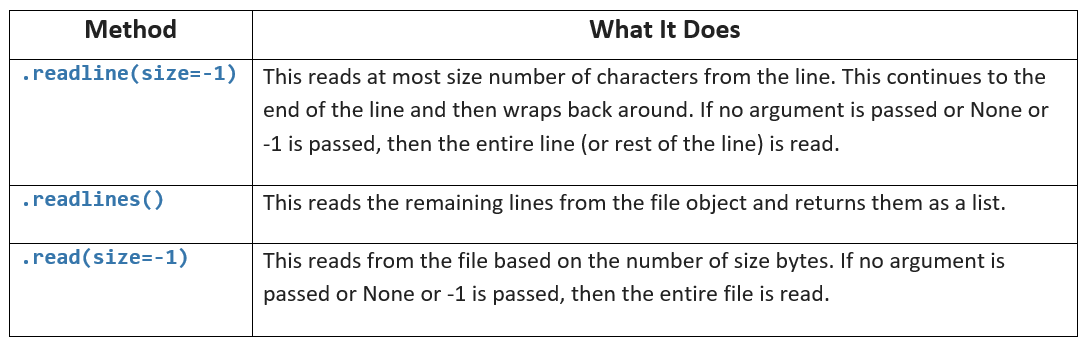
The function readline reads a line from the file including the newline character which exists at the end of the line in a file. Observe the diference with respect to input(). The function input does not read the newline.

In [ ]:
t.txt

do not
trouble trouble
till trouble
troubles you

We shall now examine parts of the file 2_file_read.py.

In [6]:
f = open("t.txt", "r")

line1 = f.readline()
print("first line : ", line1) # do not

line2 = f.readline()
print("second line : ", line2) # trouble trouble

line1 = line1.strip(); 
line2 = line2.strip()
print("File contents after removing newline character by strip() method:")
print("first line : ", line1)
print("second line : ", line2)
f.close()

first line :  do not

second line :  trouble trouble

File contents after removing newline character by strip() method:
first line :  do not
second line :  trouble trouble


The readline also causes the cursor or offset – the position from the file where the next operation would happen – to change to the location past the end of the line in the file. This readline reads the next line in the file into the variable.

The presence of newline in each variable read from a file causes lots of problem in processing. We would prefer to get them removed. This is the way to remove any white space at either end of a string.

line1 = line1.strip(); line2 = line2.strip()


In [12]:
# To read a file completely, we may want to use readline in a loop.

f = open("t.txt", "r")
line = f.readline()
while line:
    line = line.strip() # remember to assign back to line!!
    print(line)
    line = f.readline()
f.close()

do not
trouble trouble
till trouble
troubles you


As we keep reading from a file, we would reach the end of the file at some point. When we reach the end of the file, there is nothing more to read and readline returns an empty string. So, now you can understand the condition of the while. Would this code work if the input file is empty?

In [13]:
f = open("t.txt", "r")
line = f.readline()
while line:
    print(line, end='')
    line = f.readline()
f.close()

do not
trouble trouble
till trouble
troubles you

Note: In the above code, the statement  print(line, end='') is having the argument end=' ', that is used to prevent Python from adding an additional newline to the text that is being printed and only print what is being read from the file.

In [14]:
f = open("t.txt", "r")
line = f.readline()
i = 0
while line:
    line = line.strip() # remember to assign back to line!!
    i += 1
    print(i, ":", line)
    line = f.readline()
f.close()


1 : do not
2 : trouble trouble
3 : till trouble
4 : troubles you


###### There are a number of ways reading using a file object.
1)	readline : reads a line

2)	readlines : reads the whole file into a list – where each element of the list is a line of the file.


In [8]:
f = open("t.txt", "r")
lines = f.readlines()
f.close()
# print(lines) #['do not\n', 'trouble trouble\n', 'till trouble\n', 'troubles you\n']

for line in lines:
    line = line.strip()
    print(line)


do not
trouble trouble
till trouble
troubles you

Note: The strip() method removes whitespace by default, so there is no need to call it with parameters like '\t' or '\n'. However, strings in Python are immutable and can't be modified. The result is a new string which is returned by the call.

In [16]:
# Simplified and equivalent code of the above program 
f = open("t.txt", "r")

for line in f.readlines():
    print(line, end='')
f.close()


do not
trouble trouble
till trouble
troubles you

###### There are a number of ways reading using a file object.
1)	readline : reads a line

2)	readlines : reads the whole file into a list – where each element of the list is a line of the file

3)	read : reads a number of bytes from the file. By default reads the whole file into a string.


In [9]:
f = open("t.txt", "r")
all = f.read()
print(all)
print(type(all))
f.close()

do not
tro
<class 'str'>


As reading the whole file is read into the memory, the file should not be very big.

In [19]:
# The program below reads from the file based on the number of size bytes mentioned 
f = open("t.txt", "r")
firstnbytes = f.read(10)
print(firstnbytes)
f.close()

do not
tro


###### There are a number of ways reading using a file object.
1)	readline : reads a line

2)	readlines : reads the whole file into a list – where each element of the list is a line of the file

3)	read : reads a number of bytes from the file. By default reads the whole file into a string.

4)	use the file object as an iterable.


One of the most interesting feature of Python is the for loop. The for loop can step through any object which is iterable – which supports a function called __ iter __ to create an iterator which in turn should support the function __ next __ get the next element. The file object is iterable. Each time we iterate through the for loop, we get a line of the file.

In [21]:
f = open("butter.txt", "r")
for line in f :
    line = line.strip()
    print(line)
f.close()

betty botter bought some butter
but the butter was bitter
betty botter bought some better butter
to make the bitter butter better


In [1]:
# Let us look at a small program to create a file.

fout = open("out.txt", "w")
print(fout, type(fout))
print("hello world", file = fout)
fout.close()

<_io.TextIOWrapper name='out.txt' mode='w' encoding='cp1252'> <class '_io.TextIOWrapper'>


##### There are a couple of ways to write to a filename
* print with the keyword parameter file having the file object as the argument
* write on file object – is not discussed in this course.


In [2]:
# This code creates a new file with the lines having the word trouble 
  # in the file t.txt. 

# pick all lines containing trouble and write to another file

fin = open("t.txt")
fout = open("t_new.txt", "w")
for line in fin:
    if 'trouble' in line :
        line = line.strip()
        print(line, file = fout)
fin.close()
fout.close()

##### Using with statement with files
The with statement was introduced in python 2.5. The with statement is useful in the case of manipulating the files. The with statement is used in the scenario where a pair of statements is to be executed with a block of code in between.

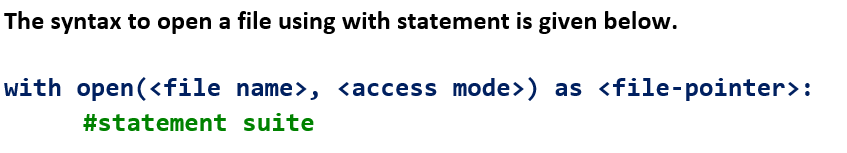   
The advantage of using with statement is that it provides the guarantee to close the file regardless of how the nested block exits.
It is always suggestible to use the with statement in the case of files because, if the break, return, or exception occurs in the nested block of code then it automatically closes the file. It doesn't let the file to be corrupted.


In [3]:
with open("file.txt",'r') as f:  
    content = f.read();  
    print(content)  

Python is the modern day language. It makes things so simple.


References:
1.	17_File.pdf – Prof. N S Kumar, Dept. of CSE, PES University.
2.	https://realpython.com/courses/reading-and-writing-csv-files/
3.	https://realpython.com/working-with-files-in-python/
4.	https://realpython.com/python-csv/
5.	http://www.trytoprogram.com/python-programming/python-files-io
6.	https://docs.python.org/3/tutorial/inputoutput.html
